# Notebook 2

## Instructions

**README** 

* **Navigating this notebook on Google Colab:** There will be text blocks and code blocks throughout the notebook. The text blocks, such as this one, will contain instructions and questions for you to consider. The code blocks, such as the one below, will contain executible code.  Sometimes you will have to modify the code blocks following the instructions in the text blocks. You can run the code block by either pressing `control/cmd + enter` or by clicking the arrow on left-hand side as shown.

    ![img.png](https://github.com/neurosymbolic-learning/Neurosymbolic_Tutorial/blob/popl23/imgs/guide.png?raw=true)

* **Saving Work**: If you wish to save your work in this `.ipynb`, we recommend [downloading](https://colab.research.google.com/drive/158b2-QhmlNnftfP0nOhYZK3UnOTmcAo-?authuser=1#scrollTo=Yw_du6e3fShY&line=4&uniqifier=1) the compressed repository from GitHub, unzipping it, uploading it to Google Drive, opening this notebook from within Google Drive, and setting `WITHIN_GDRIVE` to `True`.

* This notebook doesn't require any modifications inside the `code_and_data` directory for a base walkthrough, but if you want to work on the optional exercises throughout the notebook, you will need to modify `dsl.ipynb`.

In [1]:
# (Optional) Are you loading data from within Google Drive?
WITHIN_GDRIVE = False # otherwise: True

In [2]:
# Setup repository and download toy CalMS21 data
if not WITHIN_GDRIVE:
  !git clone https://github.com/neurosymbolic-learning/Neurosymbolic_Tutorial.git /content/Neurosymbolic_Tutorial
  %cd /content/Neurosymbolic_Tutorial/code_and_data
  !gdown 1XPUF4n5iWhQw8v1ujAqDpFefJUVEoT4L && (unzip -o calms21_task1.zip; rm -rf calms21_task1.zip )
else:
  from google.colab import drive
  drive.mount('/content/drive')
  # Change this path to match the corect destination
  %cd /content/drive/MyDrive/Neurosymbolic_Tutorial/code_and_data/
  import os; assert os.path.exists("dsl.py"), f"Couldn't find `dsl.py` at this location {os.getcwd()}. HINT: Are you within `code_and_data`"
  !gdown 1XPUF4n5iWhQw8v1ujAqDpFefJUVEoT4L && (unzip -o calms21_task1.zip; rm -rf calms21_task1.zip )


import os
import matplotlib.pyplot as plt
import numpy as np

fatal: destination path '/content/Neurosymbolic_Tutorial' already exists and is not an empty directory.
/content/Neurosymbolic_Tutorial/code_and_data
Downloading...
From: https://drive.google.com/uc?id=1XPUF4n5iWhQw8v1ujAqDpFefJUVEoT4L
To: /content/Neurosymbolic_Tutorial/code_and_data/calms21_task1.zip
100% 18.2M/18.2M [00:00<00:00, 167MB/s]
Archive:  calms21_task1.zip
  inflating: data/calms21_task1/test_data.npy  
  inflating: data/calms21_task1/test_investigation_labels.npy  
  inflating: data/calms21_task1/test_mount_labels.npy  
  inflating: data/calms21_task1/test_trajectory_data.npy  
  inflating: data/calms21_task1/train_data.npy  
  inflating: data/calms21_task1/train_investigation_labels.npy  
  inflating: data/calms21_task1/train_mount_labels.npy  
  inflating: data/calms21_task1/train_trajectory_data.npy  
  inflating: data/calms21_task1/val_data.npy  
  inflating: data/calms21_task1/val_investigation_labels.npy  
  inflating: data/calms21_task1/val_mount_labels.npy  
  inf

# (Important!) Convert Notebooks to Python Files

If you update the DSL in `dsl.ipynb` or the search algorithm in `near.ipynb`, you need to run this cell again to update the code in this notebook.


In [ ]:
!jupyter nbconvert --to python dsl.ipynb
!jupyter nbconvert --to python near.ipynb

[NbConvertApp] Converting notebook dsl.ipynb to python
[NbConvertApp] Writing 41254 bytes to dsl.py
[NbConvertApp] Converting notebook near.ipynb to python
[NbConvertApp] Writing 39669 bytes to near.py


# Search Tree Visualization

The Domain-Specific Languages we use for behavior analysis are in `dsl.ipynb`. Through this notebook, you will be training enumeration algorithms to search through the space of programs defined by this DSL, and there will also be exercises to modify the DSL to improve program performance.

See the figure below for a visualization of the search tree using an example DSL.

![neurosym-enumeration.drawio (1).png](https://github.com/neurosymbolic-learning/Neurosymbolic_Tutorial/blob/popl23/imgs/dslRollout.png?raw=true)

# Enumeration: Base DSL

The enumeration algorithm will enumerate through all symbolic programs until `max_num_programs` is reached. Optional: see `ENUMERATION` in `near.ipynb` if you are interested in the implementation! Since the number of programs at each depth may be large, the argument `max_num_programs` limits the total number of programs we train.

We start with enumerating 25 programs (which enables us to search up to depth 5) using a basic DSL. Looking at the results printed at the end, do you observe anything common or different across program structures for the best and worst programs?

Note that: 
*     `score` = 1 - F1 Score
*     `struct_cost` = cost of program structure (more complex programs have higher structural costs)
*     `path_cost` = score + struct_cost


In [ ]:
!yes | python train.py \
--algorithm enumeration \
--exp_name investigation_base \
--trial 1 \
--seed 1 \
--dsl_str "default" \
--train_data "data/calms21_task1/train_data.npy" \
--test_data "data/calms21_task1/test_data.npy" \
--valid_data "data/calms21_task1/val_data.npy" \
--train_labels "data/calms21_task1/train_investigation_labels.npy" \
--test_labels "data/calms21_task1/test_investigation_labels.npy" \
--valid_labels "data/calms21_task1/val_investigation_labels.npy" \
--input_type "list" \
--output_type "atom" \
--input_size 18 \
--output_size 1 \
--num_labels 1 \
--lossfxn "bcelogits" \
--learning_rate 0.0001 \
--symbolic_epochs 12 \
--max_num_programs 25 \
--class_weights "2.0"

Seed is 1
Experiment log and results saved at: results/investigation_base_enumeration_sd_1_001

DEBUG: starting enumerative synthesis with depth 1
DEBUG: 0 programs found
DEBUG: starting enumerative synthesis with depth 2
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 3
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 4
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 5
DEBUG: 648 programs found
Symbolic Synthesis: generated 648/25 symbolic programs from candidate program.
Training candidate program (1/25) Start(Window5Avg(ResAngleHeadBodySelect()))
/content/drive/MyDrive/neurosymbolic_summer_school_notebooks/code_and_data_4/near.py:222: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  batch_input = [torc

# Enumeration: Morlet DSL

We now switch to using a DSL with a more powerful temporal filter. Optional: see `DSL_DICT_MOR` and `MorletFilterOp` in `dsl.ipynb` for the implementation of the filter. Instead of only taking the running average across a set window, the Morlet filter is a learnable temporal filter parametrized by `s` and `w`, where `s` controls frequency and `w` controls filter width:

![morlet.png](https://github.com/neurosymbolic-learning/Neurosymbolic_Tutorial/blob/popl23/imgs/morletEq.png?raw=true)

![morlet_filter.png](https://github.com/neurosymbolic-learning/Neurosymbolic_Tutorial/blob/popl23/imgs/morletViz.png?raw=true)

Do you observe anything common or different across program structures for the best and worst programs using the Morlet Filter? How does the performance compare to the base DSL?


In [ ]:
!yes | python train.py \
--algorithm enumeration \
--exp_name investigation_morlet \
--trial 1 \
--seed 1 \
--dsl_str "morlet" \
--train_data "data/calms21_task1/train_data.npy" \
--test_data "data/calms21_task1/test_data.npy" \
--valid_data "data/calms21_task1/val_data.npy" \
--train_labels "data/calms21_task1/train_investigation_labels.npy" \
--test_labels "data/calms21_task1/test_investigation_labels.npy" \
--valid_labels "data/calms21_task1/val_investigation_labels.npy" \
--input_type "list" \
--output_type "atom" \
--input_size 18 \
--output_size 1 \
--num_labels 1 \
--lossfxn "bcelogits" \
--learning_rate 0.0001 \
--symbolic_epochs 12 \
--max_num_programs 25 \
--class_weights "2.0"

Seed is 1
Experiment log and results saved at: results/investigation_morlet_enumeration_sd_1_001

DEBUG: starting enumerative synthesis with depth 1
DEBUG: 0 programs found
DEBUG: starting enumerative synthesis with depth 2
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 3
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 4
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 5
DEBUG: 648 programs found
Symbolic Synthesis: generated 648/25 symbolic programs from candidate program.
Training candidate program (1/25) Start(MorletFilterOp(ResAngleHeadBodySelect()))
/content/drive/MyDrive/neurosymbolic_summer_school_notebooks/code_and_data_4/near.py:222: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  batch_input =


# Enumeration with Neural Modules in DSL

So far, the base and Morlet filter DSLs we have used do not contain any neural modules. The code below trains neurosymbolic programs by using `DSL_DICT_NEUROSYM` from  `dsl.ipynb`. This DSL include `NeuralFeatureSelectionFunction`, which trains a fully connected neural network over the features. 

How does the program found by enumeration compare to the previous ones using DSLs with feature selects? 

**Optional Exercise**: modify the architecture of `NeuralFeatureSelectionFunction` in `dsl.ipynb` to see if your can improve the model performance - it is currently a 2 layer fully connected neural network. Also you can modify `DSL_DICT_NEUROSYM` with different feature selects but note that you should not change the DSL dictionary name from `DSL_DICT_NEUROSYM`. 

In [ ]:
!yes | python train.py \
--algorithm enumeration \
--exp_name investigation_neurosym \
--trial 1 \
--seed 1 \
--dsl_str "neurosym" \
--train_data "data/calms21_task1/train_data.npy" \
--test_data "data/calms21_task1/test_data.npy" \
--valid_data "data/calms21_task1/val_data.npy" \
--train_labels "data/calms21_task1/train_investigation_labels.npy" \
--test_labels "data/calms21_task1/test_investigation_labels.npy" \
--valid_labels "data/calms21_task1/val_investigation_labels.npy" \
--input_type "list" \
--output_type "atom" \
--input_size 18 \
--output_size 1 \
--num_labels 1 \
--lossfxn "bcelogits" \
--learning_rate 0.0001 \
--symbolic_epochs 12 \
--max_num_programs 25 \
--class_weights "2.0"

Result program found in save path, overwrite log and program? [y/n]Seed is 1
Experiment log and results saved at: results/investigation_neurosym_enumeration_sd_1_001

DEBUG: starting enumerative synthesis with depth 1
DEBUG: 0 programs found
DEBUG: starting enumerative synthesis with depth 2
DEBUG: 9 programs found
DEBUG: starting enumerative synthesis with depth 3
DEBUG: 9 programs found
DEBUG: starting enumerative synthesis with depth 4
DEBUG: 9 programs found
DEBUG: starting enumerative synthesis with depth 5
DEBUG: 900 programs found
Symbolic Synthesis: generated 900/25 symbolic programs from candidate program.
Training candidate program (1/25) Start(MorletFilterOp(ResAngleHeadBodySelect()))
/content/drive/MyDrive/neurosymbolic_summer_school_notebooks/code_and_data_4/near.py:222: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered in

# Visualizing Runtime vs. Classification Performance 

To evaluate your enumeration runs, we can take the saved log files in `code_and_data/results` and plot the total runtime against F1 score.

**Optional Exercise**: Some hyperparameters that affect runtime and F1 score performance are listed below. Try changing a few of these and save a performance plot of your results!

*   `max_num_programs` : maximum number of programs to optimize for enumeration
*   `symbolic_epochs` : the number of training epochs for updating program parameters
*   You can modify the search depth with `min_enum_depth` and `max_depth`. Note that if the depth is too large, enumerating through all the programs will take a long time. 

Also remember to update `exp_name` and `trial` to prevent overwriting previous runs.

In [ ]:
# Utility functions for visualizing run time vs accuracy

def parse_runtime_f1_from_logs(log_files):

  runtime = []
  f1 = []

  runtime_key = 'Total time elapsed is:'
  f1_key = 'F1 score achieved is'

  for item in log_files:
    # If there's a list of list of files corresponding to different random seeds,
    # we take the average
    if len(item[0]) > 1:
      seed_runtime = []
      seed_f1 = []
      for seed in item:
        with open(os.path.join('results', seed, 'log.txt')) as f:
            lines = f.readlines()

            curr_runtimes = []
            for line in lines:
              if runtime_key in line:
                curr_runtimes.append(float(line.split(runtime_key)[-1].strip()))
            
              if f1_key in line:
                seed_f1.append(float(line.split(f1_key)[-1].strip()))
            seed_runtime.append(curr_runtimes[-1])
      runtime.append(np.mean(seed_runtime))
      f1.append(np.mean(seed_f1))        
    else:
      # There's only 1 seed per run
      with open(os.path.join('results', item, 'log.txt')) as f:
        lines = f.readlines()

      curr_runtimes = []
      for line in lines:
        if runtime_key in line:
          curr_runtimes.append(float(line.split(runtime_key)[-1].strip()))
      
        if f1_key in line:
          f1.append(float(line.split(f1_key)[-1].strip()))
      runtime.append(curr_runtimes[-1])

  return runtime, f1

def plot_runtime_f1(runtime, f1, labels):
  assert(len(runtime) == len(f1) == len(labels))

  fig = plt.figure()
  for i, item in enumerate(labels):
    if len(item[0]) > 1:
      item = item[0]
    plt.scatter(runtime[i], f1[i], label = item.split('_sd')[0])

  plt.xlim([10, 400])
  plt.ylim([0.3, 0.75])  
  plt.xlabel("Runtime (s)")
  plt.ylabel("F1 score")  
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1 + 0.1*len(labels)))


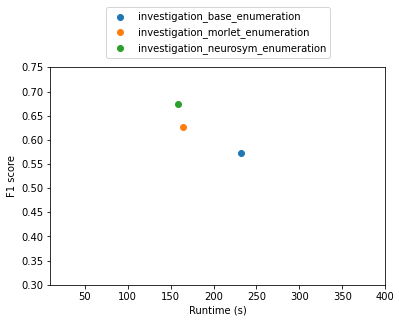

In [ ]:
# Directory names to plot inside near_code/results
run_names_to_plot = ['investigation_base_enumeration_sd_1_001', 
                     'investigation_morlet_enumeration_sd_1_001',
                     'investigation_neurosym_enumeration_sd_1_001']

runtime, f1 = parse_runtime_f1_from_logs(run_names_to_plot)

plot_runtime_f1(runtime, f1, run_names_to_plot)

**Note**: The code below will not work without running with seed = 2 for enumeration using the Morlet filter. 

We include an example of how to plot using multiple random seeds - the code will average over all entries in the list of lists.

In [ ]:
# Example of plotting with multiple random seeds
# Directory names to plot inside near_code/results
run_names_to_plot = ['investigation_base_enumeration_sd_1_001', 
                     ['investigation_morlet_enumeration_sd_1_001',
                      'investigation_morlet_enumeration_sd_2_001']]

runtime, f1 = parse_runtime_f1_from_logs(run_names_to_plot)

plot_runtime_f1(runtime, f1, run_names_to_plot)

## Printing saved programs

You can use the example below to print your saved programs in `results`.

In [ ]:
import pickle
from near import print_program

# Change the program name here if you want to print other programs
saved_program = pickle.load(open('results/investigation_morlet_enumeration_sd_1_001/program.p', 'rb'))
print(print_program(saved_program, ignore_constants = False))

# [Optional] Implement your own temporal filter

We provide an implementation for the symmetric Morlet filter (filter shape is symmetric around time 0, the current frame), which you used earlier for enumeration. 

Implement `get_filter_default_xvals` for `AsymmetricFilterOp` in `dsl.ipynb` so that you can also use `AsymMorletFilterOp` in your DSL. You can use the `get_filter_default_xvals` in `SymmetricFilterOp` as a reference. The Asymmetric Morlet filter is similar to the symmetric one, except it has two sets of parameters for `s` and `w`, one for `left`, which corresponds to timestamps before the current time, and one for `right`, which corresponds to timestamps after the current time. The filter is thus asymmetrical with different filter shapes before and after the current time.

**Hint**: How should `get_filter_default_xvals` call `get_filter` to implement the asymmetry?

**Important**: after modifying `dsl.ipynb`, you will need to re-convert your new dsl to python files, included in the cell below.

Run enumeration with your new DSL with asymmetric Morlet filter in addition to the symmetric Morlet and record your results. What happened to the search space after adding your own filter? Was your filter found by enumeration and did it improve performance?

In [ ]:
!jupyter nbconvert --to python dsl.ipynb
!jupyter nbconvert --to python near.ipynb

[NbConvertApp] Converting notebook dsl.ipynb to python
[NbConvertApp] Writing 41826 bytes to dsl.py
[NbConvertApp] Converting notebook near.ipynb to python
[NbConvertApp] Writing 39669 bytes to near.py


In [ ]:
!yes | python train.py \
--algorithm enumeration \
--exp_name investigation_asym_morlet \
--trial 1 \
--seed 1 \
--dsl_str "asym_morlet" \
--train_data "data/calms21_task1/train_data.npy" \
--test_data "data/calms21_task1/test_data.npy" \
--valid_data "data/calms21_task1/val_data.npy" \
--train_labels "data/calms21_task1/train_investigation_labels.npy" \
--test_labels "data/calms21_task1/test_investigation_labels.npy" \
--valid_labels "data/calms21_task1/val_investigation_labels.npy" \
--input_type "list" \
--output_type "atom" \
--input_size 18 \
--output_size 1 \
--num_labels 1 \
--lossfxn "bcelogits" \
--learning_rate 0.0001 \
--symbolic_epochs 12 \
--max_num_programs 25 \
--class_weights "2.0"

Seed is 1
Experiment log and results saved at: results/investigation_asym_morlet_enumeration_sd_1_001

DEBUG: starting enumerative synthesis with depth 1
DEBUG: 0 programs found
DEBUG: starting enumerative synthesis with depth 2
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 3
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 4
DEBUG: 8 programs found
DEBUG: starting enumerative synthesis with depth 5
DEBUG: 648 programs found
Symbolic Synthesis: generated 648/25 symbolic programs from candidate program.
Training candidate program (1/25) Start(AsymMorletFilterOp(ResAngleHeadBodySelect()))
/content/drive/MyDrive/neurosymbolic_summer_school_notebooks/code_and_data_4/near.py:222: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  batc

# [Optional] Open-Ended Exploration

Can you improve the performance of enumerative program search? If you feel you have a good algorithm, please run it using seed 1 (default) and submit your top program to [https://forms.gle/peEi6vryaJQejTcn9](https://forms.gle/peEi6vryaJQejTcn9). Feel free to make any changes to the code! Below are some suggestions:

*   Modifying the DSL:
    *   Are there DSL functions that are found to work better than others during enumeration? Maybe you also have ideas for new features to add to the DSL. Based on your observations, add your own dsl to `dsl.ipynb`, and note you need to update `train.py` to import your DSL. 
*   Modifying the Search Algorithm:
    *   One way to improve runtime is to train each program with a small number of epochs, but keep track of the top N programs, then train only the top N programs to convergence at the very end. To implement this, you need to modify the `ENUMERATION` class in `near.ipynb` to sort the program list based on performance, then train the top N programs for an additional number of epochs.

Tomorrow we will go over neurally-guided search to further improve the efficiency of program search. 



**Acknowledgements**: This notebook was developed by Jennifer J. Sun  (Caltech) and Atharva Sengal (UT Austin) for [the neurosymbolic summer school](http://www.neurosymbolic.org/summerschool.html). The data subset is processed from CalMS21 and the DSL is developed by by Megan Tjandrasuwita (MIT) from her work on [Interpreting Expert Annotation Differences in Animal Behavior](https://arxiv.org/pdf/2106.06114.pdf). Megan's work is partly based on [NEAR](https://github.com/trishullab/near/tree/master/near_code) by Ameesh Shah (Berkeley) and Eric Zhan (Argo).